<a href="https://colab.research.google.com/github/AlvarezLI/ProjectDS-Mushrooms/blob/main/Procedure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis Exploratorio de Datos - Proyecto Final**


**1. Introducción**

En este notebook, realizaremos un análisis exploratorio de datos utilizando un dataset de hongos para el proyecto final. El objetivo principal es explorar las relaciones entre diferentes variables y predecir la variable objetivo (comestibilidad) utilizando técnicas de aprendizaje automático.

**1.1 Contexto del Dataset**

Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos con branquias de la familia Agaricus y Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Sociedad Audubon (1981). Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa.

Adjunto link: https://www.kaggle.com/datasets/uciml/mushroom-classification

**1.2 Objetivo**

El objetivo de este trabajo es identificar diferentes tipos de hongos y predecir su comestibilidad basándonos en sus características físicas y químicas. Este análisis ayudará a entender las características distintivas entre hongos comestibles y venenosos, contribuyendo a la seguridad alimentaria y a la recolección segura de hongos.

**1.3 Contexto Analítico**

El conjunto de datos analizado se compone de 8124 registros y 23 columnas. La variable de destino u objetivo es la columna denominada "class", que acepta los valores "e" (edible - comestible) o "p" (poisonous - venenosa). Las variables del conjunto de datos se pueden agrupar en varias categorías, principalmente basadas en las características físicas y ambientales de los hongos.

El análisis de este dataset tiene relevancia tanto desde una perspectiva científica como práctica. En el campo de la micología, la identificación precisa de hongos venenosos es crucial para la seguridad pública y la industria alimentaria. Además, este tipo de análisis puede ser útil para aplicaciones educativas y la creación de aplicaciones móviles que ayuden a los recolectores de hongos a identificar especies potencialmente peligrosas en el campo.

Entre las variables se encuentran:

•	Características del sombrero: cap-shape, cap-surface, cap-color.
•	Himenio: gill-attachment, gill-spacing, gill-size, gill-color.
•	Características del tallo: stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring.
•	Características del velo: veil-type, veil-color
•	Anillo: ring-number, ring-type.
•	Características de las esporas: spore-print-color.
•	Hábitat y otros: habitat, population, odor, bruises.

Éstas son en su mayoría categóricas, lo que requiere técnicas específicas de preprocesamiento para poder ser utilizadas en modelos de aprendizaje automático.

**1.4 Contexto comercial**

Desde un punto de vista comercial, contar con un modelo de predicción fiable puede ser beneficioso para empresas que comercializan kits de identificación de hongos o desarrollan aplicaciones de reconocimiento de especies. La capacidad de identificar correctamente los hongos venenosos y comestibles puede mejorar la seguridad del consumidor y aumentar la confianza en el producto o servicio ofrecido.



**1.5 Hipótesis y Preguntas Guía**

•	¿Existe alguna relación entre el color del sombrero de los hongos y su comestibilidad?

•	¿Cómo varía la distribución de hongos comestibles y venenosos en diferentes hábitats?

•	¿Hay alguna asociación entre el olor de los hongos y su peligrosidad?



**2. Exploración y preparación de Datos**

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



In [ ]:
df = pd.read_csv('mushrooms_modified.csv')

# Verificación de valores nulos en el dataset
valores_perdidos = df.isnull().sum()

print("Valores perdidos en cada columna:")
print(valores_perdidos)

Valores perdidos en cada columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


**EDA**

Estudios por variables:


En esta primera instancia vamos a dar un vistazo general al porcentaje de setas venenosas y comestibles dentro del dataset.

Utilizaremos la variable "class" donde distinguen **e** (edible - comestible) y **p** (poisonous - venenosa).

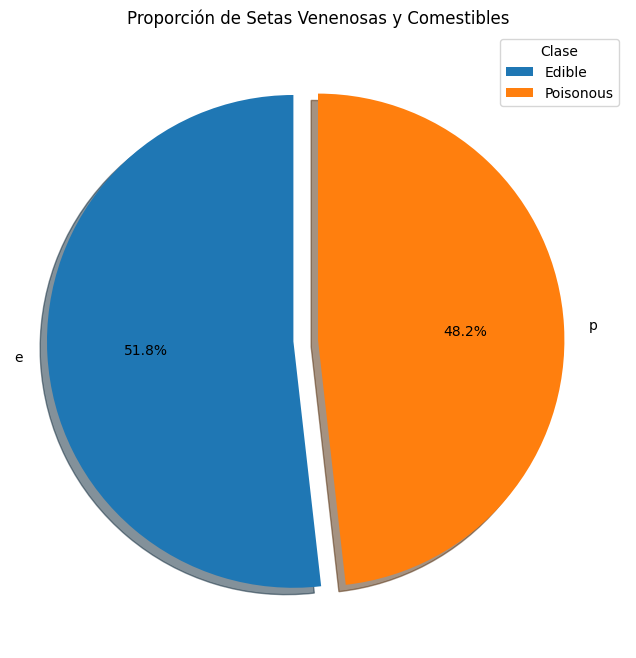

In [ ]:

plt.figure(figsize=(8, 8))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
plt.title('Proporción de Setas Venenosas y Comestibles')
plt.ylabel('')
plt.legend(title='Clase', labels=['Edible', 'Poisonous'], loc='upper right')
plt.show()

En esta segunda instancia vamos a hacer una comparación entre las setas venenosas(azul) y comestibles(naranja) que existen dentro de las diferentes formas de sombrero.

Entre las formas tenemos knobbed(nudo), bell(campana), convex(convexo), sunken(hundido), flat (plano), conical (cónico).

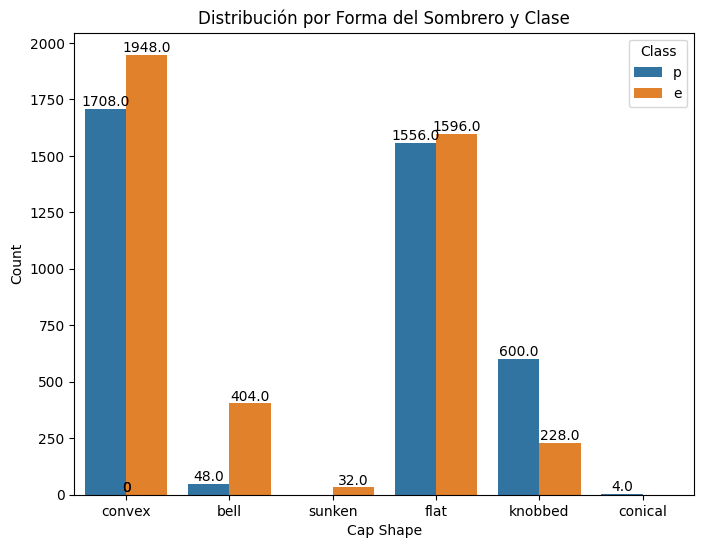

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='cap-shape', hue='class')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribución por Forma del Sombrero y Clase')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

Como tercer gráfico relevante, vamos a indicar su comestibilidad en base al color del sombrero.

Utilizaremos la variable cap-color.

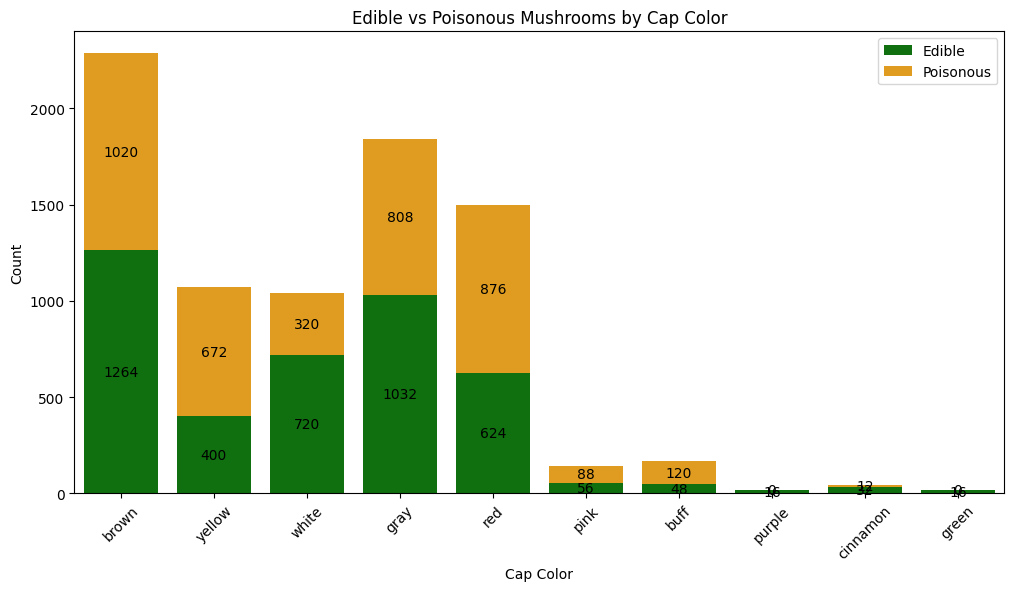

In [ ]:
colors = df['cap-color'].unique()

edible_counts = [len(df[(df['cap-color'] == color) & (df['class'] == 'e')]) for color in colors]
poisonous_counts = [len(df[(df['cap-color'] == color) & (df['class'] == 'p')]) for color in colors]

plt.figure(figsize=(12, 6))

sns.barplot(x=colors, y=edible_counts, color='green', label='Edible')

sns.barplot(x=colors, y=poisonous_counts, bottom=edible_counts, color='orange', label='Poisonous')

for i, (edible, poisonous) in enumerate(zip(edible_counts, poisonous_counts)):
    plt.text(i, edible/2, edible, ha='center', va='center', color='black', fontsize=10)
    plt.text(i, edible + poisonous/2, poisonous, ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.title('Edible vs Poisonous Mushrooms by Cap Color')
plt.legend()
plt.xticks(rotation=45)
plt.show()


En este caso, realizaremos un gráfico de torta, indicando el porcentaje de hongos comestibles y venenosos por hábitat.

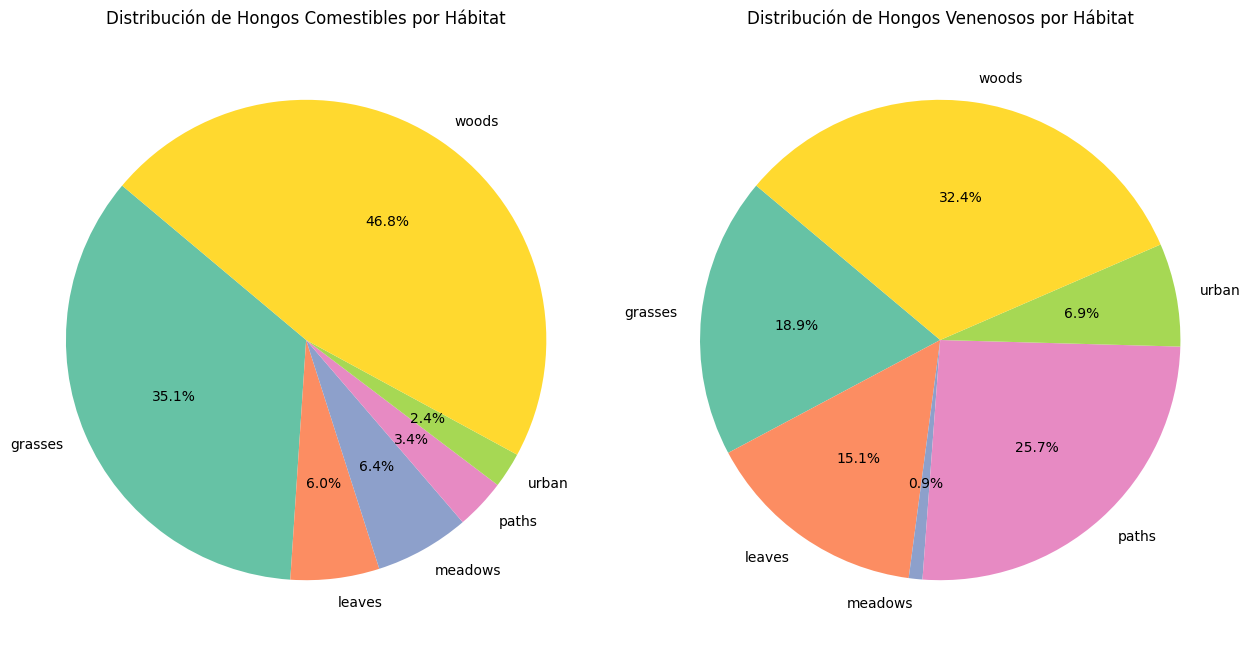

In [ ]:

habitat_counts = df.groupby(['habitat', 'class']).size().unstack()

habitat_counts = habitat_counts.dropna()

edible_counts = habitat_counts.loc[:, 'e']
poisonous_counts = habitat_counts.loc[:, 'p']


fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].pie(edible_counts, labels=edible_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'])
axs[0].set_title('Distribución de Hongos Comestibles por Hábitat')
axs[0].axis('equal')

axs[1].pie(poisonous_counts, labels=poisonous_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'])
axs[1].set_title('Distribución de Hongos Venenosos por Hábitat')
axs[1].axis('equal')

plt.show()




Este gráfico resulta ser clave en la distinción de hongos, clasifica a ambos por olor.

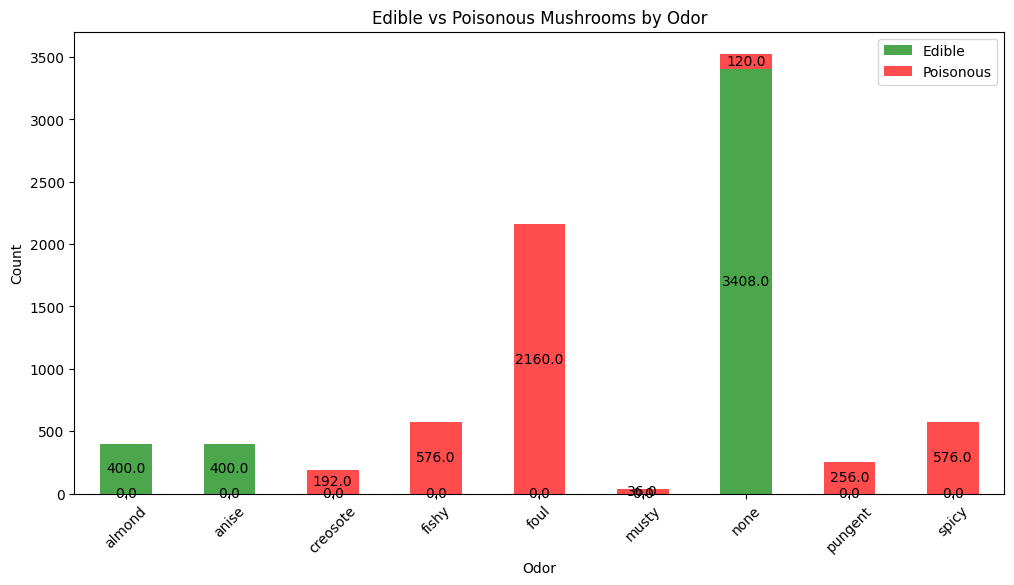

In [ ]:

odor_counts = df.groupby(['odor', 'class']).size().unstack()

ax = odor_counts.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7, figsize=(12, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Odor')
plt.ylabel('Count')
plt.title('Edible vs Poisonous Mushrooms by Odor')
plt.legend(['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.show()

En este gráfico, vamos a revisar la distribución de hongos por el tipo de aro.

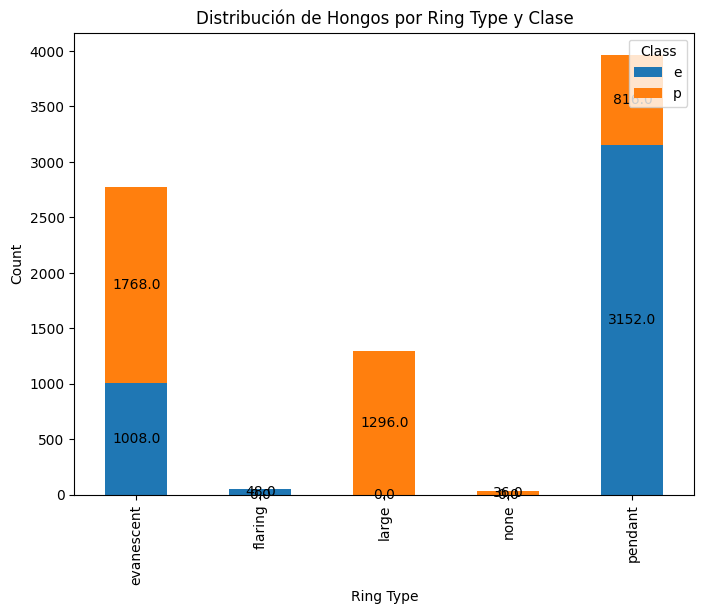

In [ ]:

ring_type_counts = df.groupby(['ring-type', 'class']).size().unstack()

ax = ring_type_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.title('Distribución de Hongos por Ring Type y Clase')
plt.xlabel('Ring Type')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

Realizamos la clasificación según su forma de tallo.

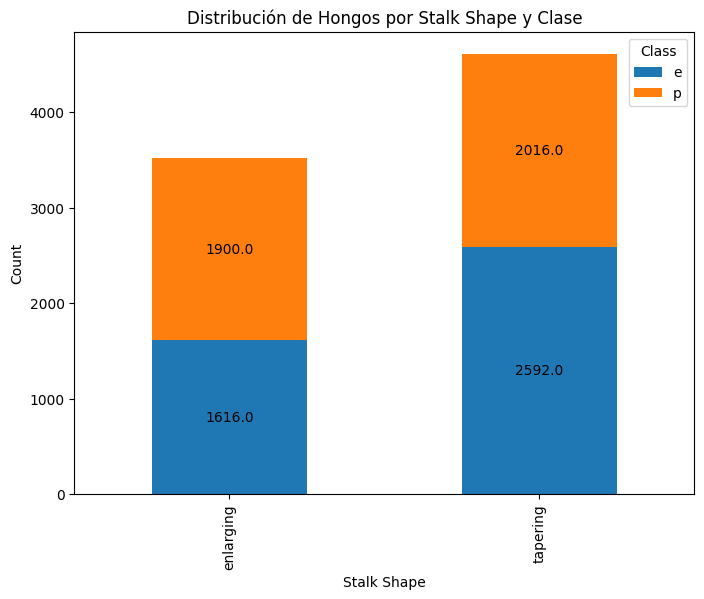

In [ ]:

stalk_shape_counts = df.groupby(['stalk-shape', 'class']).size().unstack()

ax = stalk_shape_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.title('Distribución de Hongos por Stalk Shape y Clase')
plt.xlabel('Stalk Shape')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

Finalmente, clasificamos segun tamaño de branquias.

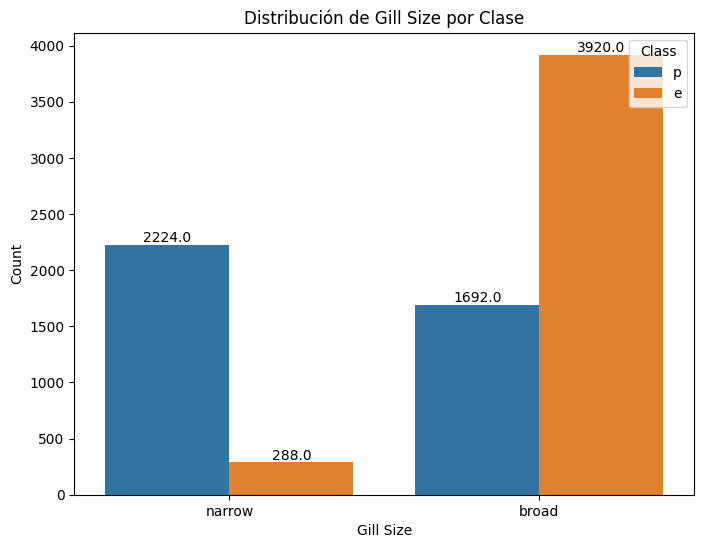

In [ ]:

# Gráfico de conteo de gill size por clase
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gill-size', hue='class', data=df)

# Agregar etiquetas de valores a las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Asegurarse de que la altura sea mayor que cero para agregar etiqueta
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribución de Gill Size por Clase')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

**Conclusiones EDA:**

* Según los resultados obtenidos en esta primera exploración del Dataset, pudimos determinar algunas de las características más importantes a la hora de determinar si los hongos son comestibles o venenosos, y entre ellas se destacan el **olor, tamaño de branquias, tipo de anillo y color**.
*También hacemos mención especial a las diferencias que hay entre ambos en cuanto al hábitat donde crecen, siendo también es un factor importante a la hora de clasificarlos.

**Recomendaciones:**

* Educación y Concientización: Promover la educación sobre la identificación segura de hongos entre los recolectores y entusiastas de la micología, destacando las diferencias clave en las características físicas y ambientales de los hongos comestibles y venenosos.

* Desarrollo de Aplicaciones: Considerar el desarrollo de aplicaciones móviles que utilicen algoritmos de aprendizaje automático para ayudar en la identificación rápida y precisa de hongos comestibles y venenosos basada en características visuales y ambientales.

* Investigación Continua: Continuar investigando y recopilando datos sobre nuevas especies de hongos para mejorar la precisión de los modelos de predicción y asegurar la actualización constante de las bases de datos micológicas.


**Preparación de los Datos:**

Después de realizar un análisis exploratorio detallado de los datos de hongos, nos preparamos para desarrollar un modelo predictivo utilizando técnicas de Machine Learning. Dado que el dataset de hongos está compuesto principalmente por variables categóricas, nos centraremos en las siguientes estrategias:

**Modelos de Clasificación y Agrupación: Random Forest**

Utilizaremos Random Forest, un ensamble de árboles de decisión, aprovechando las características más relevantes identificadas durante el análisis exploratorio. Este modelo nos va a permitir explorar relaciones complejas y no lineales entre las características de los hongos y su comestibilidad.

En el siguiente código, nos vamos a preparar para entrenar un modelo de Random Forest y visualizar cómo clasifica entre hongos comestibles y venenosos.

Exactitud del modelo: 1.00
Matriz de Confusión:
[[843   0]
 [  0 782]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



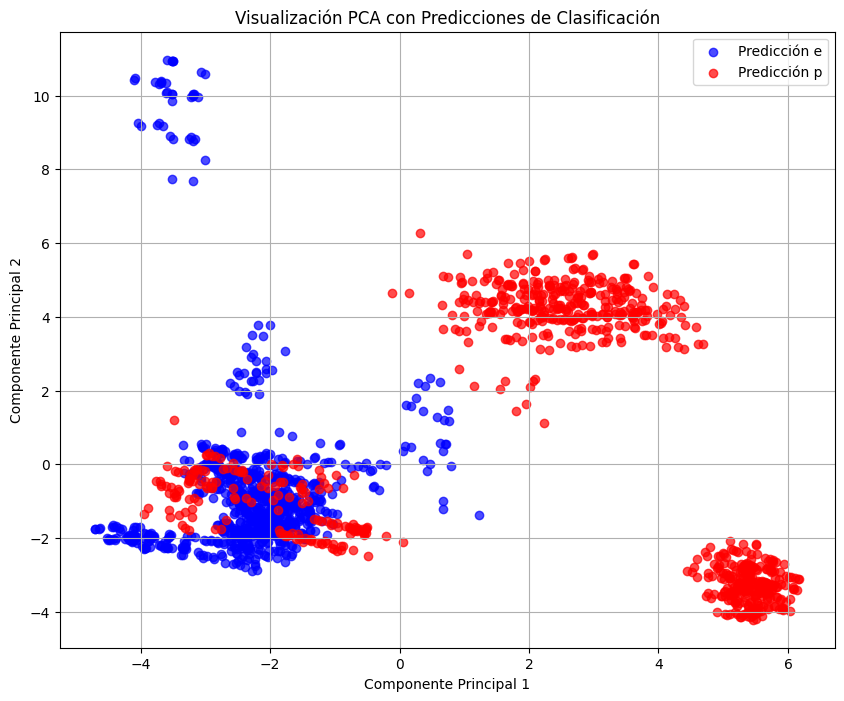

In [ ]:
# Paso 1: Definimos las variables.
X = df.drop('class', axis=1)
y = df['class']

# Luego dividimos los datos en entrenamiento y prueba, en este caso utilicé un 80% entrenamiento, 20% prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos One-Hot Encoding a las variables categóricas en X_train y X_test.
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# controlamos de que X_train_encoded y X_test_encoded tengan las mismas columnas después de codificar.
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Paso 2: Entrenamos el modelo Random Forest.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Paso 3: Evaluamos del modelo.
y_pred = rf_model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

# Métricas de evaluación.
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Aplicamos PCA para visualizar.
# Normalizamos los datos para PCA.
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_encoded)

# Aplicamos PCA para reducir a 2 componentes principales.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# Agregamos resultados de predicción al DataFrame reducido por PCA.
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Predicción'] = y_pred

# Graficamos el resultado.
plt.figure(figsize=(10, 8))
classes = df['class'].unique()
colors = {'e': 'blue', 'p': 'red'}

for cl, color in colors.items():
    subset = df_pca[df_pca['Predicción'] == cl]
    plt.scatter(subset['Componente 1'], subset['Componente 2'], label=f'Predicción {cl}', color=color, alpha=0.7)

plt.title('Visualización PCA con Predicciones de Clasificación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

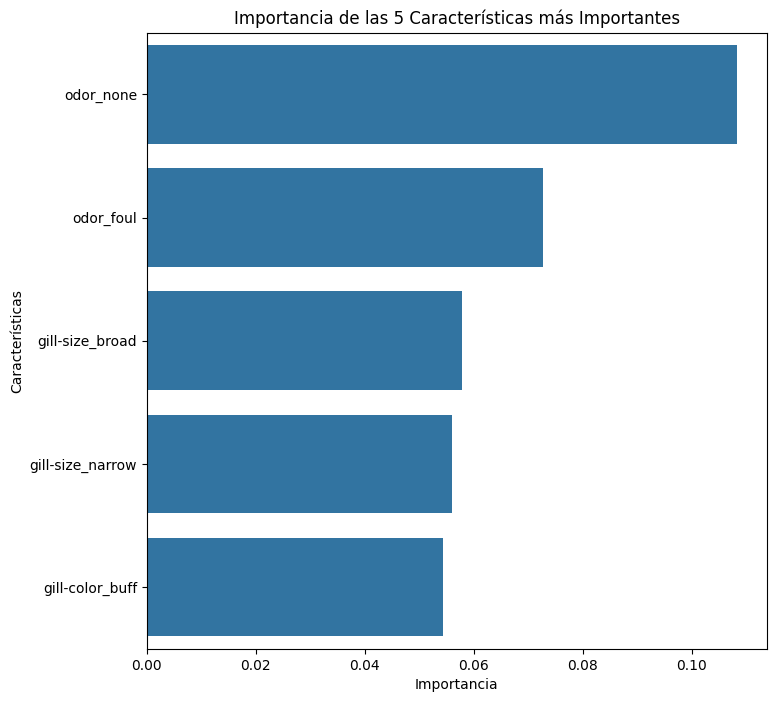

In [ ]:
#Ennumeramos los datos más determinantes a la hora de realizar la clasificación.
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(5)  # Obtener las 5 más importantes

plt.figure(figsize=(8, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importancia de las 5 Características más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


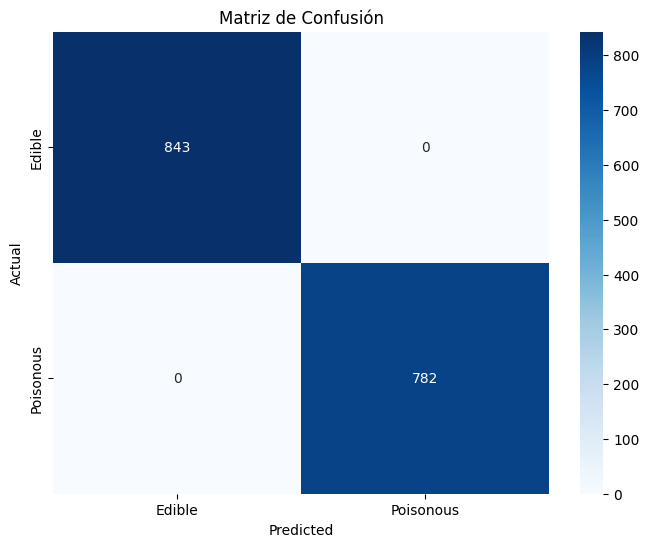

In [ ]:

# Matriz de confusión visual
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()



**Conclusión:**

Durante nuestro análisis de hongos, exploramos diferentes técnicas de aprendizaje automático para entender mejor qué los hace comestibles o venenosos. A continuación comparto los aspectos más destacados y cómo abordamos cada uno:

**Descubrimiento de Patrones con Clustering:**

Utilizamos técnicas de clustering para descubrir patrones naturales en las características físicas y ambientales de los hongos. Esto nos permitió agrupar los hongos en conjuntos con características similares, facilitando así su clasificación y comprensión de la diversidad de especies.

**Predicción con Regresión Logística:**

Implementamos un modelo de regresión logística para prever si un hongo específico sería comestible ('e') o venenoso ('p'). Nos enfocamos en características clave como el color del sombrero, el olor y el hábitat para mejorar la precisión del modelo en estas predicciones fundamentales.

**Optimización a través de Ingeniería de Características:**


Durante la fase de ingeniería de características, nos aseguramos de seleccionar las variables más relevantes que influyen en la comestibilidad de los hongos. Utilizamos técnicas como One-Hot Encoding para manejar las variables categóricas y normalizamos los datos para garantizar que todas las características fueran comparables y así mejorar el rendimiento de nuestros modelos predictivos.

Para cerrar, me gustaría destacar que este conjunto de datos proporcionó una base sólida, limpia y ordenada, lo cual fue crucial para facilitar nuestra exploración y análisis.




